# Credit Card Fraud Detection Using Machine Learning Methods

<p>Credit card fraud poses a significant and persistent threat to financial institutions and cardholders worldwide. As technology advances, so do the methods employed by fraudsters, making it increasingly challenging to detect and prevent unauthorized transactions. Traditional rule-based systems often struggle to keep pace with evolving fraud tactics, highlighting the need for more sophisticated and adaptive approaches.

Machine learning has emerged as a powerful tool in the fight against credit card fraud. Leveraging the ability to analyze vast amounts of transaction data and identify patterns, machine learning models can enhance fraud detection systems by learning from historical cases and adapting to new and emerging fraud schemes. These models excel at recognizing subtle anomalies and unusual patterns that might escape traditional rule-based systems.

In this context, we will explore the application of machine learning to the credit card fraud detection problem, employing a diverse set of sampling methods in combination with various machine learning models. Our analysis will be conducted on the 'creditcard.csv' dataset, a commonly used dataset in the field. This dataset contains a rich set of features associated with credit card transactions, including anonymized transaction amounts, time stamps, and other relevant information. By utilizing different sampling methods and machine learning techniques, we aim to demonstrate how these models can effectively discern between legitimate and fraudulent transactions. Through this exploration, we seek insights into the capabilities of machine learning, particularly in the context of different sampling strategies, in mitigating the risks associated with credit card fraud and enhancing the robustness of fraud detection systems.</p>

## Import Libraries

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest, RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

## Import Dataset

<p>The dataset, 'creditcard.csv,' captures the credit card transactions conducted by European cardholders in September 2013. This temporal snapshot spans two days and encompasses 492 instances of fraudulent transactions, constituting a mere 0.172% of the overall transactions. Notably imbalanced, this dataset presents a challenge for traditional fraud detection methods.

To prepare the data for analysis, a Principal Component Analysis (PCA) transformation has been applied. Consequently, the dataset exclusively contains numerical input variables labeled as V1, V2, V3, and so forth. However, two features, 'Time' and 'Amount,' have not undergone PCA transformation. 'Time' denotes the elapsed seconds between transactions, while 'Class' assigns a binary label of 1 for fraudulent transactions and 0 for non-fraudulent transactions. This dataset, with its transformed and retained features, serves as the foundation for applying machine learning models to address the intricate problem of credit card fraud detection.</p>

In [4]:
df = pd.read_csv('data/creditcard.csv')

<p>As expected, we can see that all the features are of the float data type, excluding the class feature, which is an integer.</p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Exploratory Data Analysis (EDA)

<p>By plotting the distrubution of the classes, we can immediately see an imbalance in favour of class 0 (non-fraudulent transactions).</p>

<Axes: title={'center': "Distribution of 'Class' variable"}, xlabel='Class', ylabel='count'>

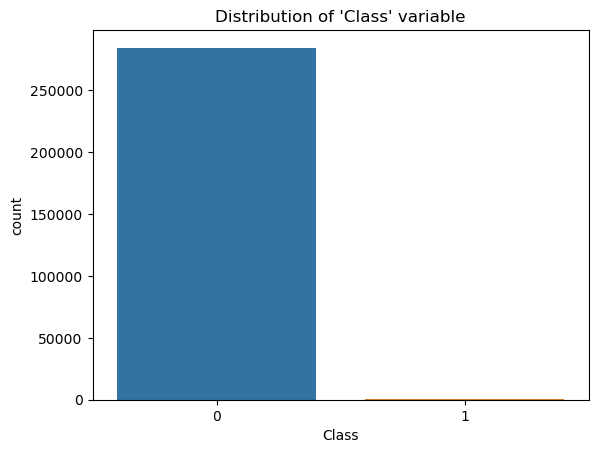

In [7]:
df['Class'].value_counts()
plt.title("Distribution of 'Class' variable")
sns.countplot(x=df['Class'], data=df)

<p>When plotting a correlation heatmap, we find there to be no evident correlation between any of the features. This is expected due to the data having undergone and PCA transformation.</p>

<Axes: >

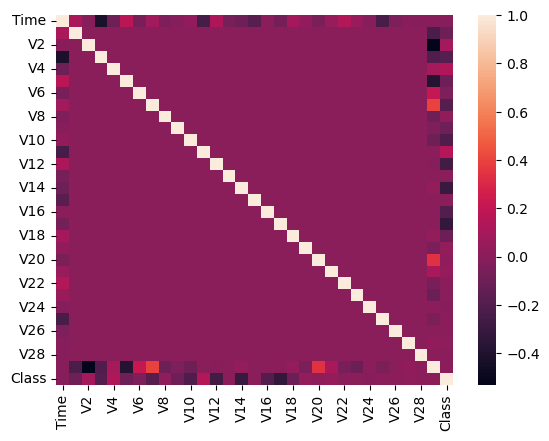

In [8]:
sns.heatmap(df.corr())

<p>Plotting the distribution of transaction amounts and filtering by fraudulent transactions reveals that the majority of frauds committed were of small monetary amounts. This is likely due to smaller amounts being less likely to be flagged as a fraudulent transaction.</p>

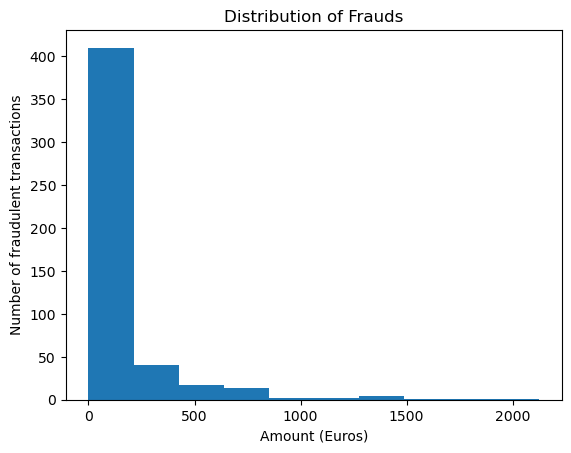

In [30]:
plt.hist(df['Amount'][df['Class']==1])
plt.title('Distribution of Frauds')
plt.xlabel('Amount (Euros)')
plt.ylabel('Number of fraudulent transactions')
plt.show()

<p>If we plot the distribution of transaction amounts and filter by non-fraudulent transactions, we can see that the majority of these transactions are under 2500 euros. This further supports why the majority of fraudulent transactions are of smaller monetary amounts.</p>

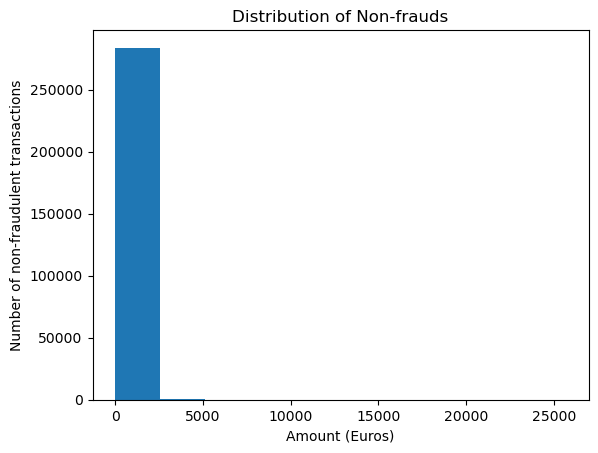

In [31]:
plt.hist(df['Amount'][df['Class']==0])
plt.title('Distribution of Non-frauds')
plt.xlabel('Amount (Euros)')
plt.ylabel('Number of non-fraudulent transactions')
plt.show()

<p>Our target variable for this research is the class variable, as we are using machine learning models to predict whether or not a transaction should be classified as fraudulent (1) or non-fraudulent (0).</p>

In [27]:
X = df.drop(columns=['Class'])
y = df['Class']

<p>Now, that we have isolated our target variable, let's double-check that no data has been lost been printing out its dimensions.</p>

In [11]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


<p>Next we will split the data into training and testing sets using a 70/30 split.</p>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

<p>Then we scale the data.Scaling the data after a Principal Component Analysis (PCA) transformation is essential for three main reasons. Firstly, it ensures that principal components, which represent the most significant sources of variance, are on a consistent scale. This prevents features with larger variances from disproportionately influencing the analysis. Secondly, many machine learning algorithms are sensitive to the scale of input features, and scaling helps these algorithms converge faster and more reliably. Lastly, maintaining the interpretability of the transformed data is crucial, and scaling ensures that the relationships between principal components and original features remain meaningful. In summary, post-PCA scaling contributes to the stability and effectiveness of machine learning models applied to the transformed dataset.<p>

In [29]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Random Undersampling

In [13]:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X, y)

### SVM 

In [14]:
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [15]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       492
           1       0.99      0.83      0.90       492

    accuracy                           0.91       984
   macro avg       0.92      0.91      0.91       984
weighted avg       0.92      0.91      0.91       984



In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.11      0.81      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.90      0.60     85443
weighted avg       1.00      0.99      0.99     85443



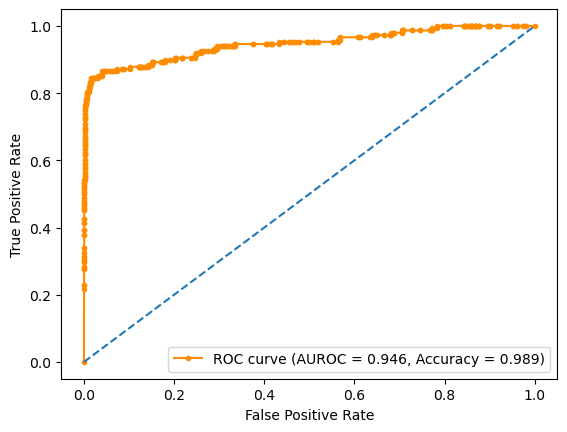

In [17]:
model_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, model_probs)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model_probs)
label = f"ROC curve (AUROC = {auc_score:.3f}, Accuracy = {accuracy:.3f})"
plt.plot(fpr, tpr, color='darkorange', marker='.', label=label)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

### Isolation Forest

In [18]:
model = IsolationForest(n_estimators=100, contamination=0.5, random_state=42)
model.fit(X_train)

y_train_pred = model.predict(X_train)
y_train_pred = [1 if i == -1 else 0 for i in y_train_pred]

y_pred = model.predict(X_test)
y_pred = [1 if i == -1 else 0 for i in y_pred]

In [19]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       492
           1       0.76      0.76      0.76       492

    accuracy                           0.76       984
   macro avg       0.76      0.76      0.76       984
weighted avg       0.76      0.76      0.76       984



In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     85295
           1       0.01      0.77      0.01       148

    accuracy                           0.74     85443
   macro avg       0.50      0.76      0.43     85443
weighted avg       1.00      0.74      0.85     85443



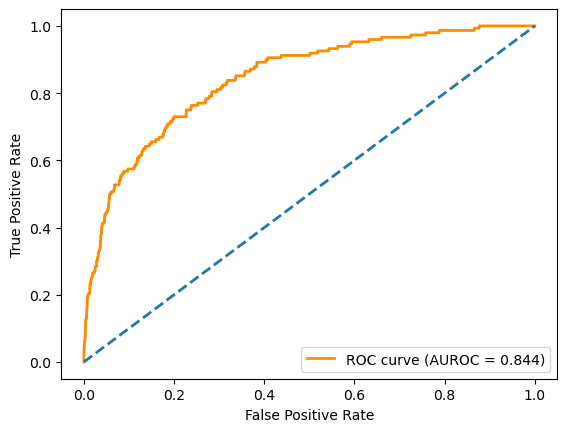

In [21]:
y_scores = model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, -y_scores)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUROC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [22]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [23]:
y_train_pred = model.predict(X_train)

y_pred = model.predict(X_test)

In [24]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       1.00      0.98      0.99       492

    accuracy                           0.99       984
   macro avg       0.99      0.99      0.99       984
weighted avg       0.99      0.99      0.99       984



In [ ]:
print(classification_report(y_test, y_pred))

## Near-Miss Undersampling 

In [26]:
nearmiss = NearMiss(version=3)
X_train, y_train = nearmiss.fit_resample(X, y)

In [ ]:
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
classification_report(y_train, y_train_pred)

In [ ]:
classification_report(y_test, y_pred)

In [ ]:
model_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, model_probs)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model_probs)
label = f"ROC curve (AUROC = {auc_score:.3f}, Accuracy = {accuracy:.3f})"
plt.plot(fpr, tpr, color='darkorange', marker='.', label=label)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

## Tomek Links

In [ ]:
tomeklinks = TomekLinks()
X_train, y_train = tomeklinks.fit_resample(X, y)

In [1]:
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

NameError: name 'SVC' is not defined

In [ ]:
classification_report(y_train, y_train_pred)

In [ ]:
classification_report(y_test, y_pred)